In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, SinkCache

/Users/aszab/EDU/CAM/modules/R244/project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
LLAMA_3_PATH = "/Users/aszab/repos/models/Llama-3.2-1B"

tokenizer = AutoTokenizer.from_pretrained(LLAMA_3_PATH)
model = AutoModelForCausalLM.from_pretrained(LLAMA_3_PATH)

if tokenizer.pad_token_id is None:
    tokenizer.pad_token = tokenizer.eos_token

inputs = tokenizer(
    "This is a long story about unicorns, fairies and magic.", return_tensors="pt"
).to(model.device)

# get our cache, specify number of sink tokens and window size
# Note that window size already includes sink tokens, so has to be larger
past_key_values = SinkCache(window_length=256, num_sink_tokens=4)
model = torch.compile(model)
out = model.generate(
    **inputs, do_sample=False, max_new_tokens=30, past_key_values=past_key_values
)
tokenizer.batch_decode(out, skip_special_tokens=True)[0]

/Users/aszab/EDU/CAM/modules/R244/project/venv/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/Users/aszab/EDU/CAM/modules/R244/project/venv/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


'This is a long story about unicorns, fairies and magic. It is a story about the power of imagination and the importance of believing in yourself. It is a story about the magic of childhood and the joy of'

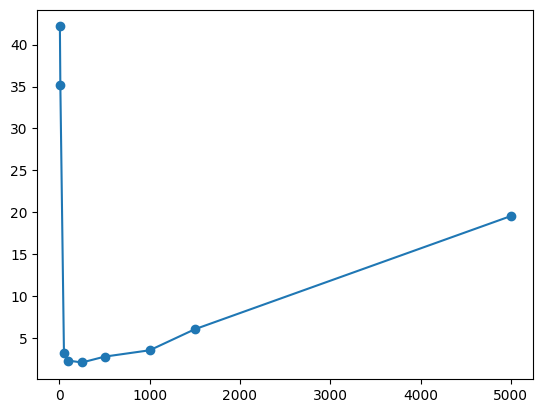

In [5]:
import matplotlib.pyplot as plt

lst = [
    (5, 42.157936811447144),
    (10, 35.17445087432861),
    (50, 3.2748210430145264),
    (100, 2.3141109943389893),
    (250, 2.0921871662139893),
    (500, 2.7887728214263916),
    (1000, 3.5481820106506348),
    (1500, 6.057107210159302),
    (5000, 19.54934787750244),
]
plt.plot(list(zip(*lst))[0], list(zip(*lst))[1], "-o")

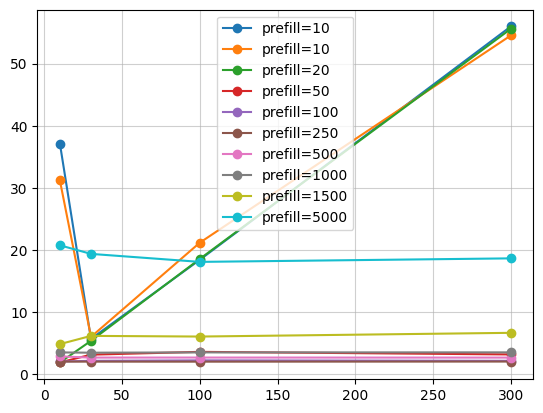

In [12]:
prefill_size0, lst0 = 5, [
    (10, 37.1192090511322),
    (30, 5.640225887298584),
    (100, 18.39100170135498),
    (300, 55.98724675178528),
]

prefill_size1, lst1 = 10, [
    (10, 31.17673134803772),
    (30, 5.964144945144653),
    (100, 21.15057897567749),
    (300, 54.536463022232056),
]
prefill_size2, lst2 = 20, [
    (10, 1.8416268825531006),
    (30, 5.330860137939453),
    (100, 18.5358567237854),
    (300, 55.603663206100464),
]
prefill_size3, lst3 = 50, [
    (10, 1.8455142974853516),
    (30, 3.1021881103515625),
    (100, 3.5532419681549072),
    (300, 3.1364219188690186),
]
prefill_size4, lst4 = 100, [
    (10, 2.0011730194091797),
    (30, 2.107008934020996),
    (100, 2.1839029788970947),
    (300, 2.1105329990386963),
]
prefill_size5, lst5 = 250, [
    (10, 1.9854426383972168),
    (30, 1.9761791229248047),
    (100, 1.9726378917694092),
    (300, 1.9896750450134277),
]
prefill_size6, lst6 = 500, [
    (10, 2.8176157474517822),
    (30, 2.6309192180633545),
    (100, 2.635589122772217),
    (300, 2.629164934158325),
]
prefill_size7, lst7 = 1000, [
    (10, 3.464529037475586),
    (30, 3.4175679683685303),
    (100, 3.464897871017456),
    (300, 3.4723620414733887),
]
prefill_size8, lst8 = 1500, [
    (10, 4.802953004837036),
    (30, 6.127195119857788),
    (100, 6.019899129867554),
    (300, 6.619053840637207),
]
prefill_size9, lst9 = 5000, [
    (10, 20.7241849899292),
    (30, 19.34046196937561),
    (100, 18.052364110946655),
    (300, 18.619763135910034),
]

plt.plot(list(zip(*lst0))[0], list(zip(*lst0))[1], "-o", label="prefill=10")
plt.plot(list(zip(*lst1))[0], list(zip(*lst1))[1], "-o", label="prefill=10")
plt.plot(list(zip(*lst2))[0], list(zip(*lst2))[1], "-o", label="prefill=20")
plt.plot(list(zip(*lst3))[0], list(zip(*lst3))[1], "-o", label="prefill=50")
plt.plot(list(zip(*lst4))[0], list(zip(*lst4))[1], "-o", label="prefill=100")
plt.plot(list(zip(*lst5))[0], list(zip(*lst5))[1], "-o", label="prefill=250")
plt.plot(list(zip(*lst6))[0], list(zip(*lst6))[1], "-o", label="prefill=500")
plt.plot(list(zip(*lst7))[0], list(zip(*lst7))[1], "-o", label="prefill=1000")
plt.plot(list(zip(*lst8))[0], list(zip(*lst8))[1], "-o", label="prefill=1500")
plt.plot(list(zip(*lst9))[0], list(zip(*lst9))[1], "-o", label="prefill=5000")
plt.grid(alpha=0.6, zorder=1)

plt.legend()

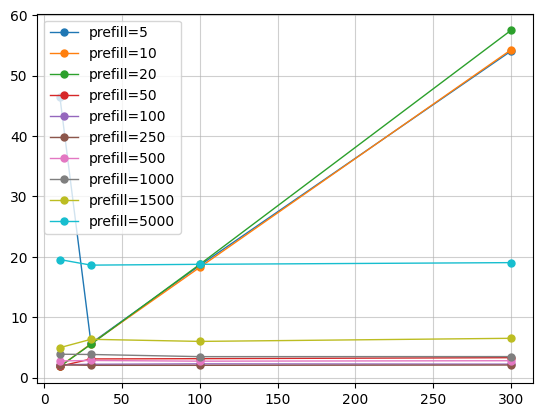

In [ ]:
prefill_size0, lst0 = 5, [
    (10, 46.47002696990967),
    (30, 5.689178943634033),
    (100, 18.5946102142334),
    (300, 54.05599784851074),
]
prefill_size1, lst1 = 10, [
    (10, 1.8605937957763672),
    (30, 5.612466096878052),
    (100, 18.282422065734863),
    (300, 54.26568102836609),
]
prefill_size2, lst2 = 20, [
    (10, 1.8574168682098389),
    (30, 5.538291931152344),
    (100, 18.769134044647217),
    (300, 57.486531257629395),
]
prefill_size3, lst3 = 50, [
    (10, 1.8929469585418701),
    (30, 3.1070680618286133),
    (100, 3.1510989665985107),
    (300, 3.3124351501464844),
]
prefill_size4, lst4 = 100, [
    (10, 2.1269781589508057),
    (30, 2.225322961807251),
    (100, 2.2935938835144043),
    (300, 2.242405891418457),
]
prefill_size5, lst5 = 250, [
    (10, 2.1223089694976807),
    (30, 2.047985792160034),
    (100, 2.0488860607147217),
    (300, 2.095651865005493),
]
prefill_size6, lst6 = 500, [
    (10, 2.7673239707946777),
    (30, 2.850416898727417),
    (100, 2.7369110584259033),
    (300, 2.8097457885742188),
]
prefill_size7, lst7 = 1000, [
    (10, 3.885232925415039),
    (30, 3.844569683074951),
    (100, 3.487112045288086),
    (300, 3.4951250553131104),
]
prefill_size8, lst8 = 1500, [
    (10, 4.9737842082977295),
    (30, 6.3558549880981445),
    (100, 6.009104013442993),
    (300, 6.52241587638855),
]
prefill_size9, lst9 = 5000, [
    (10, 19.557289838790894),
    (30, 18.63616394996643),
    (100, 18.77132296562195),
    (300, 19.051335096359253),
]

plt.plot(
    list(zip(*lst0))[0],
    list(zip(*lst0))[1],
    "-o",
    label="prefill=5",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst1))[0],
    list(zip(*lst1))[1],
    "-o",
    label="prefill=10",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst2))[0],
    list(zip(*lst2))[1],
    "-o",
    label="prefill=20",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst3))[0],
    list(zip(*lst3))[1],
    "-o",
    label="prefill=50",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst4))[0],
    list(zip(*lst4))[1],
    "-o",
    label="prefill=100",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst5))[0],
    list(zip(*lst5))[1],
    "-o",
    label="prefill=250",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst6))[0],
    list(zip(*lst6))[1],
    "-o",
    label="prefill=500",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst7))[0],
    list(zip(*lst7))[1],
    "-o",
    label="prefill=1000",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst8))[0],
    list(zip(*lst8))[1],
    "-o",
    label="prefill=1500",
    linewidth=1,
    markersize=5,
)
plt.plot(
    list(zip(*lst9))[0],
    list(zip(*lst9))[1],
    "-o",
    label="prefill=5000",
    linewidth=1,
    markersize=5,
)
plt.grid(alpha=0.6, zorder=1)

plt.legend()

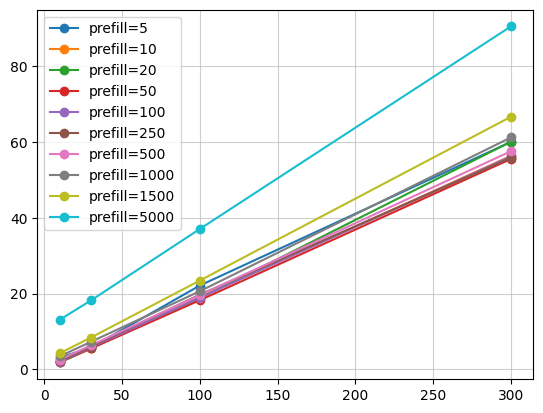

In [13]:
prefill_size0, lst0 = 5, [
    (10, 3.103394031524658),
    (30, 5.796746015548706),
    (100, 22.127134799957275),
    (300, 59.97067379951477),
]
prefill_size1, lst1 = 10, [
    (10, 1.8404691219329834),
    (30, 5.536619186401367),
    (100, 19.019823789596558),
    (300, 56.303977966308594),
]
prefill_size2, lst2 = 20, [
    (10, 1.8421401977539062),
    (30, 5.624450206756592),
    (100, 18.79854679107666),
    (300, 60.02699899673462),
]
prefill_size3, lst3 = 50, [
    (10, 2.028010845184326),
    (30, 5.52606201171875),
    (100, 18.265290021896362),
    (300, 55.48003911972046),
]
prefill_size4, lst4 = 100, [
    (10, 2.040381908416748),
    (30, 5.789814233779907),
    (100, 18.922472953796387),
    (300, 56.173661947250366),
]
prefill_size5, lst5 = 250, [
    (10, 2.2952260971069336),
    (30, 6.038847923278809),
    (100, 19.71198010444641),
    (300, 55.811386823654175),
]
prefill_size6, lst6 = 500, [
    (10, 2.5814578533172607),
    (30, 6.3865790367126465),
    (100, 19.602407217025757),
    (300, 57.51864695549011),
]
prefill_size7, lst7 = 1000, [
    (10, 3.495635986328125),
    (30, 7.289889812469482),
    (100, 20.61863899230957),
    (300, 61.1631920337677),
]
prefill_size8, lst8 = 1500, [
    (10, 4.302863121032715),
    (30, 8.422266960144043),
    (100, 23.441543102264404),
    (300, 66.60878419876099),
]
prefill_size9, lst9 = 5000, [
    (10, 13.13428807258606),
    (30, 18.21126389503479),
    (100, 37.03754711151123),
    (300, 90.4262158870697),
]

plt.plot(list(zip(*lst0))[0], list(zip(*lst0))[1], "-o", label="prefill=5")
plt.plot(list(zip(*lst1))[0], list(zip(*lst1))[1], "-o", label="prefill=10")
plt.plot(list(zip(*lst2))[0], list(zip(*lst2))[1], "-o", label="prefill=20")
plt.plot(list(zip(*lst3))[0], list(zip(*lst3))[1], "-o", label="prefill=50")
plt.plot(list(zip(*lst4))[0], list(zip(*lst4))[1], "-o", label="prefill=100")
plt.plot(list(zip(*lst5))[0], list(zip(*lst5))[1], "-o", label="prefill=250")
plt.plot(list(zip(*lst6))[0], list(zip(*lst6))[1], "-o", label="prefill=500")
plt.plot(list(zip(*lst7))[0], list(zip(*lst7))[1], "-o", label="prefill=1000")
plt.plot(list(zip(*lst8))[0], list(zip(*lst8))[1], "-o", label="prefill=1500")
plt.plot(list(zip(*lst9))[0], list(zip(*lst9))[1], "-o", label="prefill=5000")
plt.grid(alpha=0.6, zorder=1)

plt.legend()